<a href="https://colab.research.google.com/github/sidusit/MTech-Dissertation/blob/main/2_Model_DL_v2_DecPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle as p
import warnings
warnings.filterwarnings('ignore')

In [ ]:
TCS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/TCS_stock_v2_PreProcessed.csv")
HDFC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/HDFC_stock_v2_PreProcessed.csv")
HUL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/HUL_stock_v2_PreProcessed.csv")
MARUTI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/MARUTI_stock_v2_PreProcessed.csv")

In [ ]:
TCS_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/TCS_SMA_PreProcessed.csv')
HDFC_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HDFC_SMA_PreProcessed.csv')
HUL_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HUL_SMA_PreProcessed.csv')
MARUTI_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/MARUTI_SMA_PreProcessed.csv')

TCS_EMA_sub =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/TCS_EMA_PreProcessed.csv')
HDFC_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators//HDFC_EMA_PreProcessed.csv')
HUL_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HUL_EMA_PreProcessed.csv')
MARUTI_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/MARUTI_EMA_PreProcessed.csv')

### Data Proprocessing

In [ ]:
def Dataset(Data, column, datecol,date):

  Train_Data = Data[column][Data[datecol] < date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data[column][Data[datecol] >= date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 11

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 3), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [ ]:
model = Model()

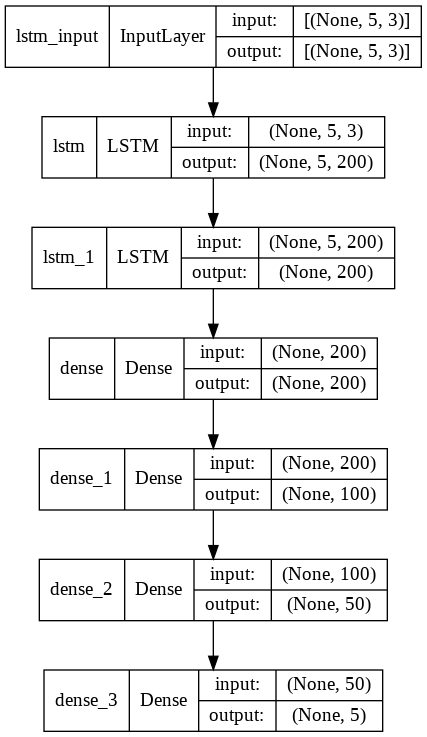

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            163200    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 549,605
Trainable params: 549,605
Non-trai

### Custom Learning Rate

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

#TCS

In [ ]:
TCS.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,TCS.NS,2021-10-25,3503.00,3514.55,3450.0,3492.95,3492.95,2594211.0,3599.849,3704.2600,3719.0880,-0.001686
693,TCS.NS,2021-10-26,3494.50,3529.00,3475.0,3482.60,3482.60,3877980.0,3580.255,3686.9100,3721.8334,-0.002963
694,TCS.NS,2021-10-27,3483.00,3511.25,3483.0,3489.75,3489.75,2509919.0,3564.645,3672.8020,3722.4930,0.002053
695,TCS.NS,2021-10-28,3518.00,3518.00,3415.0,3421.65,3421.65,2423261.0,3541.990,3654.6525,3721.6000,-0.019514
696,TCS.NS,2021-10-29,3400.05,3453.75,3395.5,3434.40,3434.40,1390025.0,3524.285,3637.9565,3719.3630,0.003726


In [ ]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [ ]:
# Change Dtype of date column
TCS["date"] = pd.to_datetime(TCS["date"])
TCS_SMA_sub['time'] = pd.to_datetime(TCS_SMA_sub['time'])
TCS_EMA_sub['time'] = pd.to_datetime(TCS_EMA_sub['time'])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [ ]:
TCS_date = '2021-08-01'
TCS_Train_X, TCS_Train_Y, TCS_Test_X, TCS_Test_Y = Dataset(TCS,'adj close', 'date', TCS_date)
TCS_Train_SMA_X, TCS_Train_SMA_Y, TCS_Test_SMA_X, TCS_Test_SMA_Y = Dataset(TCS_SMA_sub,'SMA', 'time', TCS_date)
TCS_Train_EMA_X, TCS_Train_EMA_Y, TCS_Test_EMA_X, TCS_Test_EMA_Y = Dataset(TCS_EMA_sub,'EMA', 'time', TCS_date)

In [ ]:
TCS_Train_X.shape, TCS_Train_Y.shape, TCS_Test_X.shape, TCS_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS['adj close'].head(20)

0     1788.18
1     1807.44
2     1785.50
3     1763.79
4     1783.57
5     1779.48
6     1773.28
7     1774.78
8     1731.56
9     1704.02
10    1755.28
11    1757.49
12    1784.00
13    1789.98
14    1797.57
15    1791.16
16    1766.39
17    1790.83
18    1808.96
19    1841.17
Name: adj close, dtype: float64

In [ ]:
TCS_Train_X[0], TCS_Train_Y[0]

(array([[1788.18],
        [1807.44],
        [1785.5 ],
        [1763.79],
        [1783.57]]), array([[1779.48],
        [1773.28],
        [1774.78],
        [1731.56],
        [1704.02]]))

In [ ]:
TCS_Train_X[1], TCS_Train_Y[1]

(array([[1779.48],
        [1773.28],
        [1774.78],
        [1731.56],
        [1704.02]]), array([[1755.28],
        [1757.49],
        [1784.  ],
        [1789.98],
        [1797.57]]))

In [ ]:
TCS['adj close'].tail(20)

677    3723.06
678    3766.07
679    3825.96
680    3803.60
681    3885.44
682    3928.11
683    3678.54
684    3645.85
685    3648.20
686    3611.45
687    3647.15
688    3634.15
689    3608.85
690    3532.50
691    3498.85
692    3492.95
693    3482.60
694    3489.75
695    3421.65
696    3434.40
Name: adj close, dtype: float64

In [ ]:
TCS_Train_SMA_X.shape, TCS_Train_SMA_Y.shape, TCS_Test_SMA_X.shape, TCS_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS_Train_EMA_X.shape, TCS_Train_EMA_Y.shape, TCS_Test_EMA_X.shape, TCS_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS_Train_X[0], TCS_Train_SMA_X[0]

(array([[1788.18],
        [1807.44],
        [1785.5 ],
        [1763.79],
        [1783.57]]), array([[1837.1739],
        [1831.0021],
        [1824.2374],
        [1816.3589],
        [1816.3016]]))

In [ ]:
TCS_Final_Train_X = np.concatenate((TCS_Train_X, TCS_Train_SMA_X, TCS_Train_EMA_X), axis=2)
TCS_Final_Test_X = np.concatenate((TCS_Test_X, TCS_Test_SMA_X, TCS_Test_EMA_X), axis=2)

In [ ]:
TCS_Final_Train_X.shape, TCS_Train_Y.shape, TCS_Final_Test_X.shape, TCS_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [ ]:
TCS_Model = Model()

In [ ]:
TCS_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
TCS_hist = TCS_Model.fit(TCS_Final_Train_X, TCS_Train_Y, epochs = 10000, validation_data = (TCS_Final_Test_X, TCS_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 166ms/step - loss: 4876033.0000 - root_mean_squared_error: 2208.1741 - val_loss: 7129329.5000 - val_root_mean_squared_error: 2670.0803
Epoch 2/10000
4/4 [==============================] - 0s 34ms/step - loss: 1675776.8750 - root_mean_squared_error: 1294.5181 - val_loss: 1629062.5000 - val_root_mean_squared_error: 1276.3473
Epoch 3/10000
4/4 [==============================] - 0s 36ms/step - loss: 394082.7812 - root_mean_squared_error: 627.7601 - val_loss: 365870.7188 - val_root_mean_squared_error: 604.8724
Epoch 4/10000
4/4 [==============================] - 0s 34ms/step - loss: 463885.7500 - root_mean_squared_error: 681.0916 - val_loss: 5992657.0000 - val_root_mean_squared_error: 2447.9905
Epoch 5/10000
4/4 [==============================] - 0s 36ms/step - loss: 1403749.8750 - root_mean_squared_error: 1184.7994 - val_loss: 1796409.2500 - val_root_mean_squared_error: 1340.3019
Epoch 6/10000
4/4 [==============================] - 0s

In [ ]:
history_dict = TCS_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

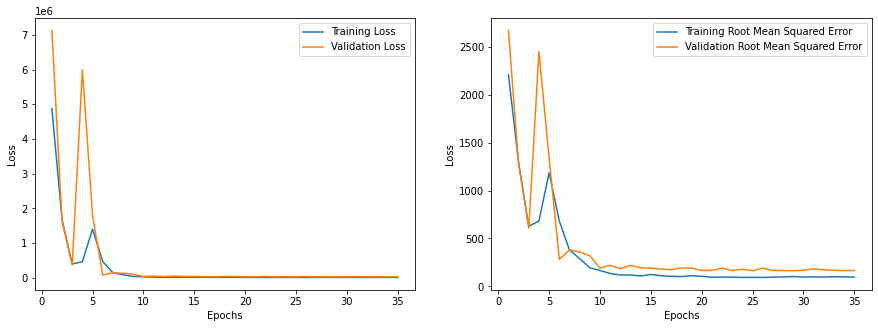

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of TCS

In [ ]:
TCS_prediction = TCS_Model.predict(TCS_Final_Test_X)

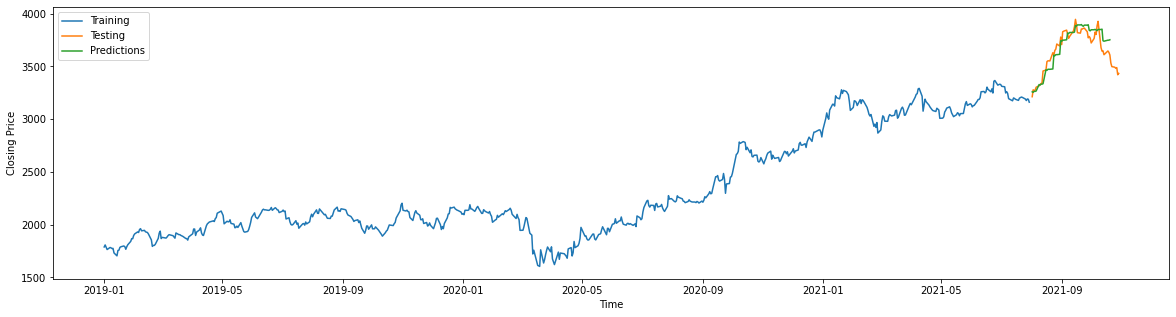

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(TCS['date'][TCS['date'] < '2021-08-01'], TCS['adj close'][TCS['date'] < '2021-08-01'], label = 'Training')
plt.plot(TCS['date'][TCS['date'] >= '2021-08-01'], TCS['adj close'][TCS['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(TCS['date'][TCS['date'] >= '2021-08-01'][:-7], TCS_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(TCS_Test_Y.reshape(-1, 5), TCS_prediction))
mape = np.mean(np.abs(TCS_prediction - TCS_Test_Y.reshape(-1, 5))/np.abs(TCS_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 163.71949139283862
MAPE: 0.0389272374955765


In [ ]:
TCS_Model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/Models/TCS_LSTM_Midsem')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/TCS_LSTM_Midsem/assets


#HDFC

In [ ]:
HDFC.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,HDFC.NS,2021-10-25,2905.00,2919.0,2856.25,2896.15,2896.15,3463033.0,2815.240,2783.7400,2772.205,-0.002686
693,HDFC.NS,2021-10-26,2908.00,2934.0,2896.00,2911.65,2911.65,2429951.0,2831.480,2787.3325,2777.063,0.005352
694,HDFC.NS,2021-10-27,2920.05,2948.0,2901.40,2915.00,2915.00,3136162.0,2847.470,2792.8350,2781.280,0.001151
695,HDFC.NS,2021-10-28,2891.00,2924.3,2863.15,2900.80,2900.80,3302501.0,2860.990,2800.5525,2784.673,-0.004871
696,HDFC.NS,2021-10-29,2891.00,2893.0,2791.20,2844.70,2844.70,3829786.0,2864.585,2805.0725,2786.799,-0.019339


In [ ]:
HDFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [ ]:
# Change Dtype of date column
HDFC["date"] = pd.to_datetime(HDFC["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [ ]:
HDFC_date = '2021-08-01'
HDFC_Train_X, HDFC_Train_Y, HDFC_Test_X, HDFC_Test_Y = Dataset(HDFC,'adj close', 'date', HDFC_date)
HDFC_Train_SMA_X, HDFC_Train_SMA_Y, HDFC_Test_SMA_X, HDFC_Test_SMA_Y = Dataset(HDFC_SMA_sub,'SMA', 'time', HDFC_date)
HDFC_Train_EMA_X, HDFC_Train_EMA_Y, HDFC_Test_EMA_X, HDFC_Test_EMA_Y = Dataset(HDFC_EMA_sub,'EMA', 'time', HDFC_date)

In [ ]:
HDFC_Train_X.shape, HDFC_Train_Y.shape, HDFC_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HDFC['adj close'].head(20)

0     1914.72
1     1887.70
2     1845.95
3     1880.02
4     1880.31
5     1867.01
6     1901.32
7     1887.17
8     1897.94
9     1876.78
10    1898.66
11    1882.31
12    1910.47
13    1912.67
14    1910.38
15    1886.50
16    1866.35
17    1878.59
18    1884.98
19    1855.53
Name: adj close, dtype: float64

In [ ]:
HDFC_Train_X[0], HDFC_Train_Y[0]

(array([[1914.72],
        [1887.7 ],
        [1845.95],
        [1880.02],
        [1880.31]]), array([[1867.01],
        [1901.32],
        [1887.17],
        [1897.94],
        [1876.78]]))

In [ ]:
HDFC_Train_X[1], HDFC_Train_Y[1]

(array([[1867.01],
        [1901.32],
        [1887.17],
        [1897.94],
        [1876.78]]), array([[1898.66],
        [1882.31],
        [1910.47],
        [1912.67],
        [1910.38]]))

In [ ]:
HDFC_Train_SMA_X.shape, HDFC_Train_SMA_Y.shape, HDFC_Test_SMA_X.shape, HDFC_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HDFC_Train_EMA_X.shape, HDFC_Train_EMA_Y.shape, HDFC_Test_EMA_X.shape, HDFC_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HDFC_Train_X[0], HDFC_Train_SMA_X[0]

(array([[1914.72],
        [1887.7 ],
        [1845.95],
        [1880.02],
        [1880.31]]), array([[1902.8489],
        [1905.3586],
        [1901.2421],
        [1900.747 ],
        [1902.8392]]))

In [ ]:
HDFC_Final_Train_X = np.concatenate((HDFC_Train_X, HDFC_Train_SMA_X, HDFC_Train_EMA_X), axis=2)
HDFC_Final_Test_X = np.concatenate((HDFC_Test_X, HDFC_Test_SMA_X, HDFC_Test_EMA_X), axis=2)

In [ ]:
HDFC_Final_Train_X.shape, HDFC_Train_Y.shape, HDFC_Final_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

In [ ]:
HDFC_Train_X.shape, HDFC_Train_Y.shape, HDFC_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

### Model Fitting

In [ ]:
HDFC_Model = Model()

In [ ]:
HDFC_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
HDFC_hist = HDFC_Model.fit(HDFC_Final_Train_X, HDFC_Train_Y, epochs = 10000, validation_data = (HDFC_Final_Test_X, HDFC_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 166ms/step - loss: 4694528.5000 - root_mean_squared_error: 2166.6860 - val_loss: 1922814.5000 - val_root_mean_squared_error: 1386.6559
Epoch 2/10000
4/4 [==============================] - 0s 44ms/step - loss: 1320728.3750 - root_mean_squared_error: 1149.2294 - val_loss: 1061844.1250 - val_root_mean_squared_error: 1030.4583
Epoch 3/10000
4/4 [==============================] - 0s 42ms/step - loss: 421455.3125 - root_mean_squared_error: 649.1959 - val_loss: 221039.2344 - val_root_mean_squared_error: 470.1481
Epoch 4/10000
4/4 [==============================] - 0s 42ms/step - loss: 172795.5469 - root_mean_squared_error: 415.6868 - val_loss: 209913.6875 - val_root_mean_squared_error: 458.1634
Epoch 5/10000
4/4 [==============================] - 0s 45ms/step - loss: 128626.1953 - root_mean_squared_error: 358.6450 - val_loss: 450393.5000 - val_root_mean_squared_error: 671.1136
Epoch 6/10000
4/4 [==============================] - 0s 43ms/

In [ ]:
history_dict = HDFC_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

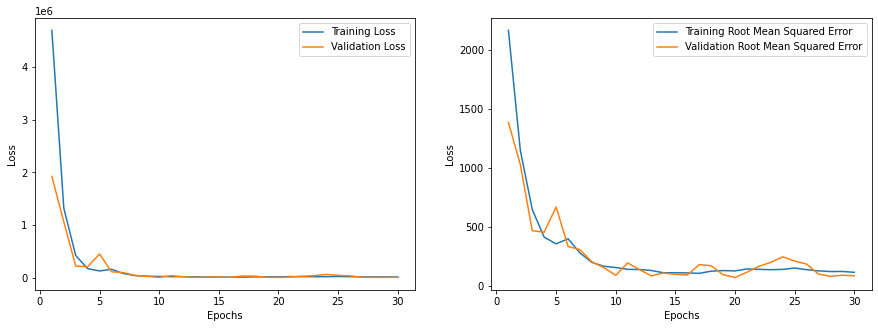

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of HDFC

In [ ]:
HDFC_prediction = HDFC_Model.predict(HDFC_Final_Test_X)

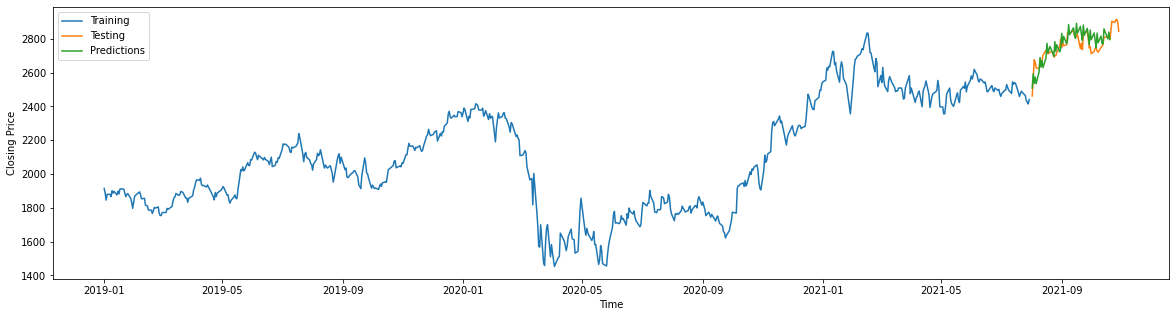

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(HDFC['date'][HDFC['date'] < '2021-08-01'], HDFC['adj close'][HDFC['date'] < '2021-08-01'], label = 'Training')
plt.plot(HDFC['date'][HDFC['date'] >= '2021-08-01'], HDFC['adj close'][HDFC['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(HDFC['date'][HDFC['date'] >= '2021-08-01'][:-7], HDFC_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(HDFC_Test_Y.reshape(-1, 5), HDFC_prediction))
mape = np.mean(np.abs(HDFC_prediction - HDFC_Test_Y.reshape(-1, 5))/np.abs(HDFC_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 74.65395774785729
MAPE: 0.022677676517898853


In [ ]:
HDFC_Model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/Models/HDFC_LSTM_Midsem')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/HDFC_LSTM_Midsem/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/HDFC_LSTM_Midsem/assets


#HUL

In [ ]:
HUL.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,HINDUNILVR.NS,2021-10-25,2454.1,2463.55,2410.00,2455.85,2455.85,1560090.0,2565.270,2628.3775,2665.198,0.000713
693,HINDUNILVR.NS,2021-10-26,2468.9,2468.90,2417.05,2436.85,2436.85,1594662.0,2544.445,2614.7450,2666.089,-0.007737
694,HINDUNILVR.NS,2021-10-27,2455.0,2455.20,2391.15,2396.60,2396.60,3082296.0,2516.490,2598.3825,2665.931,-0.016517
695,HINDUNILVR.NS,2021-10-28,2400.0,2416.00,2368.00,2389.65,2389.65,2014755.0,2490.780,2583.6000,2665.196,-0.002900
696,HINDUNILVR.NS,2021-10-29,2400.0,2400.00,2376.00,2383.60,2383.60,847292.0,2464.185,2567.6900,2663.192,-0.002532


In [ ]:
HUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [ ]:
# Change Dtype of date column
HUL["date"] = pd.to_datetime(HUL["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [ ]:
HUL_date = '2021-08-01'
HUL_Train_X, HUL_Train_Y, HUL_Test_X, HUL_Test_Y = Dataset(HUL,'adj close', 'date', HUL_date)
HUL_Train_SMA_X, HUL_Train_SMA_Y, HUL_Test_SMA_X, HUL_Test_SMA_Y = Dataset(HUL_SMA_sub,'SMA', 'time', HUL_date)
HUL_Train_EMA_X, HUL_Train_EMA_Y, HUL_Test_EMA_X, HUL_Test_EMA_Y = Dataset(HUL_EMA_sub,'EMA', 'time', HUL_date)

In [ ]:
HUL_Train_X.shape, HUL_Train_Y.shape, HUL_Test_X.shape, HUL_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HUL['adj close'].head(20)

0     1735.48
1     1719.58
2     1723.24
3     1716.78
4     1719.91
5     1706.33
6     1719.96
7     1721.12
8     1704.93
9     1699.63
10    1724.64
11    1707.97
12    1687.68
13    1680.55
14    1683.25
15    1686.43
16    1702.81
17    1695.39
18    1692.79
19    1679.49
Name: adj close, dtype: float64

In [ ]:
HUL_Train_X[0], HUL_Train_Y[0]

(array([[1735.48],
        [1719.58],
        [1723.24],
        [1716.78],
        [1719.91]]), array([[1706.33],
        [1719.96],
        [1721.12],
        [1704.93],
        [1699.63]]))

In [ ]:
HUL_Train_X[1], HUL_Train_Y[1]

(array([[1706.33],
        [1719.96],
        [1721.12],
        [1704.93],
        [1699.63]]), array([[1724.64],
        [1707.97],
        [1687.68],
        [1680.55],
        [1683.25]]))

In [ ]:
HUL_Train_SMA_X.shape, HUL_Train_SMA_Y.shape, HUL_Test_SMA_X.shape, HUL_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HUL_Train_EMA_X.shape, HUL_Train_EMA_Y.shape, HUL_Test_EMA_X.shape, HUL_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
HUL_Train_X[0], HUL_Train_SMA_X[0]

(array([[1735.48],
        [1719.58],
        [1723.24],
        [1716.78],
        [1719.91]]), array([[1738.1701],
        [1732.7018],
        [1727.2765],
        [1722.1386],
        [1720.3285]]))

In [ ]:
HUL_Final_Train_X = np.concatenate((HUL_Train_X, HUL_Train_SMA_X, HUL_Train_EMA_X), axis=2)
HUL_Final_Test_X = np.concatenate((HUL_Test_X, HUL_Test_SMA_X, HUL_Test_EMA_X), axis=2)

In [ ]:
HUL_Final_Train_X.shape, HUL_Train_Y.shape, HUL_Final_Test_X.shape, HUL_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [ ]:
HUL_Model = Model()

In [ ]:
HUL_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
HUL_hist = HUL_Model.fit(HUL_Final_Train_X, HUL_Train_Y, epochs = 10000, validation_data = (HUL_Final_Test_X, HUL_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 165ms/step - loss: 3397972.0000 - root_mean_squared_error: 1843.3590 - val_loss: 5151304.0000 - val_root_mean_squared_error: 2269.6484
Epoch 2/10000
4/4 [==============================] - 0s 45ms/step - loss: 2579889.7500 - root_mean_squared_error: 1606.2035 - val_loss: 2507693.7500 - val_root_mean_squared_error: 1583.5699
Epoch 3/10000
4/4 [==============================] - 0s 47ms/step - loss: 737558.6875 - root_mean_squared_error: 858.8124 - val_loss: 592413.5625 - val_root_mean_squared_error: 769.6841
Epoch 4/10000
4/4 [==============================] - 0s 42ms/step - loss: 220298.3906 - root_mean_squared_error: 469.3596 - val_loss: 195828.3594 - val_root_mean_squared_error: 442.5250
Epoch 5/10000
4/4 [==============================] - 0s 44ms/step - loss: 122001.1953 - root_mean_squared_error: 349.2867 - val_loss: 89931.5469 - val_root_mean_squared_error: 299.8859
Epoch 6/10000
4/4 [==============================] - 0s 41ms/s

In [ ]:
history_dict = HUL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

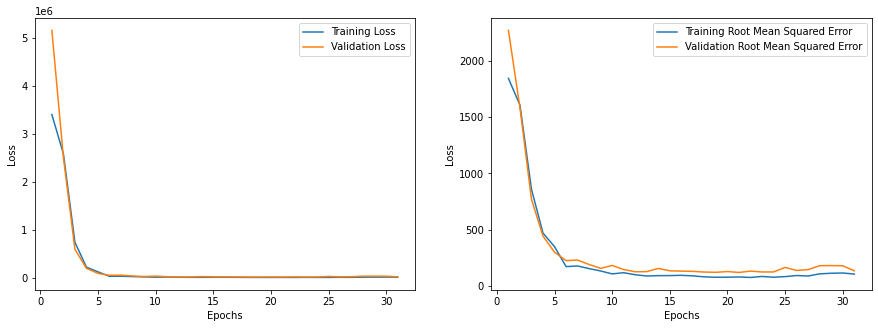

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of HUL

In [ ]:
HUL_prediction = HUL_Model.predict(HUL_Final_Test_X)

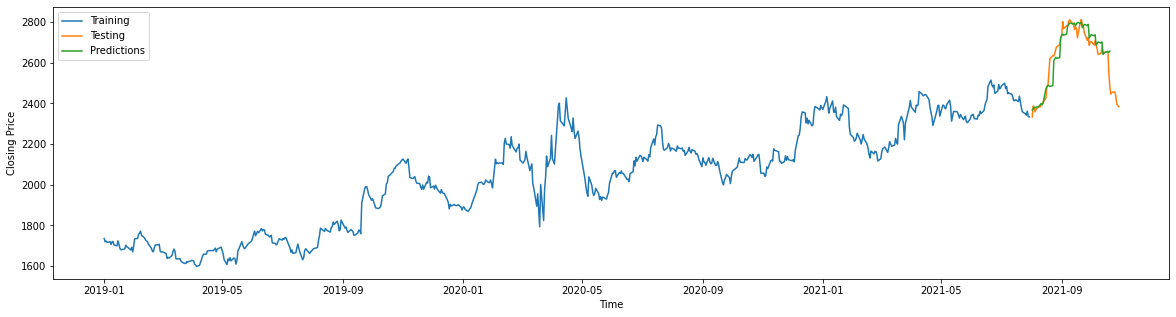

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(HUL['date'][HUL['date'] < '2021-08-01'], HUL['adj close'][HUL['date'] < '2021-08-01'], label = 'Training')
plt.plot(HUL['date'][HUL['date'] >= '2021-08-01'], HUL['adj close'][HUL['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(HUL['date'][HUL['date'] >= '2021-08-01'][:-7], HUL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(HUL_Test_Y.reshape(-1, 5), HUL_prediction))
mape = np.mean(np.abs(HUL_prediction - HUL_Test_Y.reshape(-1, 5))/np.abs(HUL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 120.06943167957516
MAPE: 0.03679192721436593


In [ ]:
HUL_Model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/Models/HUL_LSTM_Midsem')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/HUL_LSTM_Midsem/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/HUL_LSTM_Midsem/assets


#MARUTI

In [ ]:
MARUTI.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,MARUTI.NS,2021-10-25,7355.0,7396.05,7219.65,7260.60,7260.60,247986.0,7552.180,7439.1900,7082.932,-0.020016
693,MARUTI.NS,2021-10-26,7265.0,7337.95,7210.20,7297.35,7297.35,292052.0,7511.835,7433.8850,7088.639,0.005062
694,MARUTI.NS,2021-10-27,7285.0,7461.25,7244.00,7356.25,7356.25,1217557.0,7478.080,7430.5050,7095.720,0.008071
695,MARUTI.NS,2021-10-28,7250.0,7529.70,7235.05,7369.70,7369.70,961188.0,7466.835,7429.7875,7106.577,0.001828
696,MARUTI.NS,2021-10-29,7350.0,7478.15,7294.85,7466.30,7466.30,179815.0,7463.775,7436.2000,7118.195,0.013108


In [ ]:
MARUTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [ ]:
# Change Dtype of date column
MARUTI["date"] = pd.to_datetime(MARUTI["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [ ]:
MARUTI_EMA_sub.head()

,time,EMA
0,2019-01-01,7278.8306
1,2019-01-02,7227.5540
2,2019-01-03,7191.5162
3,2019-01-04,7181.7383
4,2019-01-07,7186.5146


In [ ]:
MARUTI_date = '2021-08-01'
MARUTI_Train_X, MARUTI_Train_Y, MARUTI_Test_X, MARUTI_Test_Y = Dataset(MARUTI,'adj close', 'date', MARUTI_date)
MARUTI_Train_SMA_X, MARUTI_Train_SMA_Y, MARUTI_Test_SMA_X, MARUTI_Test_SMA_Y = Dataset(MARUTI_SMA_sub,'SMA', 'time', MARUTI_date)
MARUTI_Train_EMA_X, MARUTI_Train_EMA_Y, MARUTI_Test_EMA_X, MARUTI_Test_EMA_Y = Dataset(MARUTI_EMA_sub,'EMA', 'time', MARUTI_date)

In [ ]:
MARUTI_Train_X.shape, MARUTI_Train_Y.shape, MARUTI_Test_X.shape, MARUTI_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
MARUTI['adj close'].head(20)

0     7261.91
1     7058.96
2     6996.90
3     7026.57
4     7150.46
5     7225.68
6     7277.54
7     7179.16
8     7110.10
9     7195.76
10    7143.75
11    7100.14
12    7125.40
13    7146.47
14    7001.22
15    6865.68
16    6842.91
17    6838.24
18    6326.20
19    6323.91
Name: adj close, dtype: float64

In [ ]:
MARUTI_Train_X[0], MARUTI_Train_Y[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]))

In [ ]:
MARUTI_Train_X[1], MARUTI_Train_Y[1]

(array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]), array([[7143.75],
        [7100.14],
        [7125.4 ],
        [7146.47],
        [7001.22]]))

In [ ]:
MARUTI_Train_SMA_X.shape, MARUTI_Train_SMA_Y.shape, MARUTI_Test_SMA_X.shape, MARUTI_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
MARUTI_Train_EMA_X.shape, MARUTI_Train_EMA_Y.shape, MARUTI_Test_EMA_X.shape, MARUTI_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
MARUTI_Train_X[0], MARUTI_Train_SMA_X[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[7387.3402],
        [7340.2101],
        [7271.0326],
        [7215.5207],
        [7197.2854]]))

In [ ]:
MARUTI_Final_Train_X = np.concatenate((MARUTI_Train_X, MARUTI_Train_SMA_X, MARUTI_Train_EMA_X), axis=2)
MARUTI_Final_Test_X = np.concatenate((MARUTI_Test_X, MARUTI_Test_SMA_X, MARUTI_Test_EMA_X), axis=2)

In [ ]:
MARUTI_Final_Train_X.shape, MARUTI_Train_Y.shape, MARUTI_Final_Test_X.shape, MARUTI_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [ ]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 3), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [ ]:
model = Model()

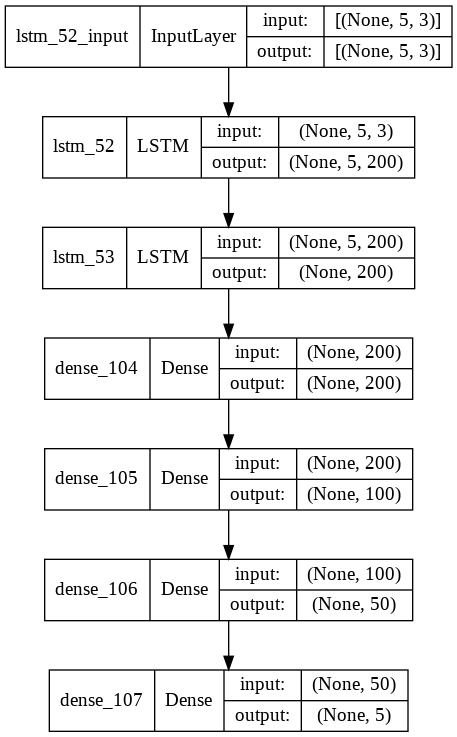

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 5, 200)            163200    
                                                                 
 lstm_53 (LSTM)              (None, 200)               320800    
                                                                 
 dense_104 (Dense)           (None, 200)               40200     
                                                                 
 dense_105 (Dense)           (None, 100)               20100     
                                                                 
 dense_106 (Dense)           (None, 50)                5050      
                                                                 
 dense_107 (Dense)           (None, 5)                 255       
                                                                 
Total params: 549,605
Trainable params: 549,605
Non-t

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 11

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
MARUTI_Model = Model()

In [ ]:
MARUTI_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
MARUTI_hist = MARUTI_Model.fit(MARUTI_Final_Train_X, MARUTI_Train_Y, epochs = 10000, validation_data = (MARUTI_Final_Test_X, MARUTI_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 4s 204ms/step - loss: 27817966.0000 - root_mean_squared_error: 5274.2739 - val_loss: 31608152.0000 - val_root_mean_squared_error: 5622.1128
Epoch 2/10000
4/4 [==============================] - 0s 48ms/step - loss: 11116940.0000 - root_mean_squared_error: 3334.2075 - val_loss: 9362743.0000 - val_root_mean_squared_error: 3059.8599
Epoch 3/10000
4/4 [==============================] - 0s 50ms/step - loss: 3933980.2500 - root_mean_squared_error: 1983.4263 - val_loss: 4002560.7500 - val_root_mean_squared_error: 2000.6400
Epoch 4/10000
4/4 [==============================] - 0s 59ms/step - loss: 1992916.6250 - root_mean_squared_error: 1411.7069 - val_loss: 255081.5469 - val_root_mean_squared_error: 505.0560
Epoch 5/10000
4/4 [==============================] - 0s 47ms/step - loss: 1013139.6875 - root_mean_squared_error: 1006.5484 - val_loss: 982779.4375 - val_root_mean_squared_error: 991.3524
Epoch 6/10000
4/4 [==============================]

In [ ]:
history_dict = MARUTI_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

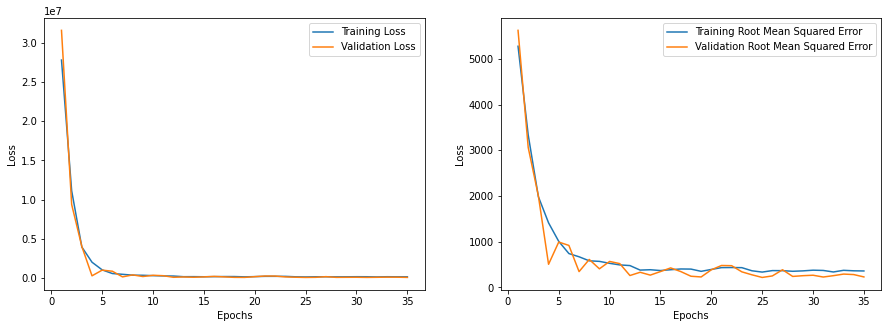

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of MARUTI

In [ ]:
MARUTI_Model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Datasets/Models/MARUTI_LSTM_Midsem')

In [ ]:
MARUTI_prediction = MARUTI_Model.predict(MARUTI_Final_Test_X)

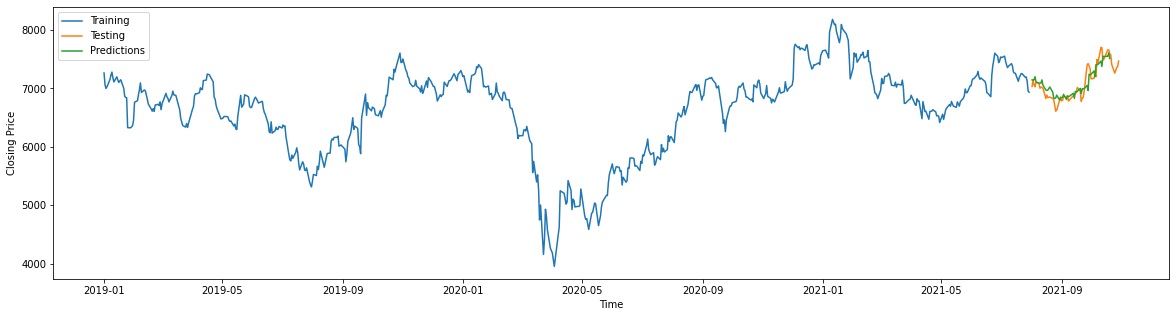

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(MARUTI['date'][MARUTI['date'] < '2021-08-01'], MARUTI['adj close'][MARUTI['date'] < '2021-08-01'], label = 'Training')
plt.plot(MARUTI['date'][MARUTI['date'] >= '2021-08-01'], MARUTI['adj close'][MARUTI['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(MARUTI['date'][MARUTI['date'] >= '2021-08-01'][:-7], MARUTI_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(MARUTI_Test_Y.reshape(-1, 5), MARUTI_prediction))
mape = np.mean(np.abs(MARUTI_prediction - MARUTI_Test_Y.reshape(-1, 5))/np.abs(MARUTI_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 217.26985721451652
MAPE: 0.024153888989365106


In [ ]:
MARUTI_Model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/Models/MARUTI_LSTM_Midsem')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/MARUTI_LSTM_Midsem/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Datasets/Models/MARUTI_LSTM_Midsem/assets
